# Tutorial for Brake Wear Emission Rate Analysis

> @File    :   Doc_3_Brake_Wear_Emission.ipynb  
@Time    :   2023/11/18 15:35:00  
@Author  :   Qiuzi Chen   
@Version :   1.0  
@Contact :   qiuzi.chen@outlook.com  
@Desc    :   Tutorial for braking activity analysis and ER calculation.

---

# 1 ER-Decel Curve

The ER-deceleration curve is generated from literature with laboratory measuremnt results. We update the dataset via meta-analysis based on the framework of MOVES. All curve parameters and literature are stored in the `BWETool` class which provides toolkits for:  
1. Braking detection;
2. OpMode recognition;
3. ER calculation.

In [1]:
# initialize a BWETool object
from emission import BWETool
BWE = BWETool()

## 1.1 Low Metallic

In [2]:
BWE.ER.LM_PM10_ERs

,Material,Decel[m/s2],PM10ER[g/hr],"Author, Year"
0,LM,0.97,2.822870,"Liu et al., 2022"
1,LM,1.07,1.490094,"Farwick Zum Hagen et al., 2019"
2,LM,1.07,3.515094,"Farwick Zum Hagen et al., 2019"
3,LM,1.20,5.520000,"Sanders et al., 2003"
4,LM,1.20,5.600000,"Sanders et al., 2003"
5,LM,2.57,0.574110,"Kim et al., 2020"
6,LM,2.84,88.241563,"Perricone et al., 2018"
7,LM,2.84,31.651865,"Perricone et al., 2018"
8,LM,2.84,64.262877,"Perricone et al., 2018"
9,LM,7.90,1481.142857,"Sanders et al., 2003"


In [4]:
BWE.ER.LM_POW_PARAM

array([1.69876055, 3.27584605])

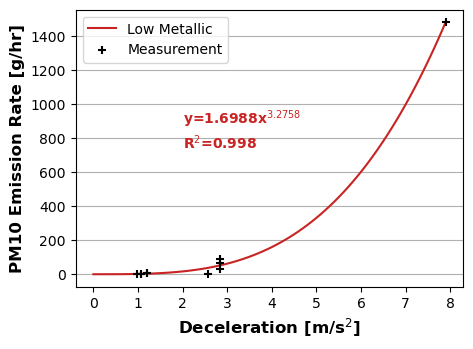

In [3]:
BWE.ER.plotERCurve("LM")

## 1.2 NAO

In [5]:
BWE.ER.NAO_PM10_ERs

,Material,Decel[m/s2],PM10ER[g/hr],"Author, Year"
10,NAO,0.30,0.033654,"Woo et al., 2021"
11,NAO,0.82,0.062070,"Woo et al., 2021"
12,NAO,0.97,0.087106,"Woo et al., 2021"
13,NAO,1.07,0.197915,"Woo et al., 2021"
14,NAO,0.97,2.661564,"Grigoratos et al., 2023"
15,NAO,0.97,4.718226,"Storch et al., 2023"
16,NAO,1.00,0.144072,"Iijima et al., 2008"
17,NAO,1.20,0.900000,"Sanders et al., 2003"
18,NAO,1.20,1.200000,"Sanders et al., 2003"
19,NAO,2.57,0.249086,"Woo et al., 2021"


In [6]:
BWE.ER.NAO_POW_PARAM

array([0.02188477, 5.20007439])

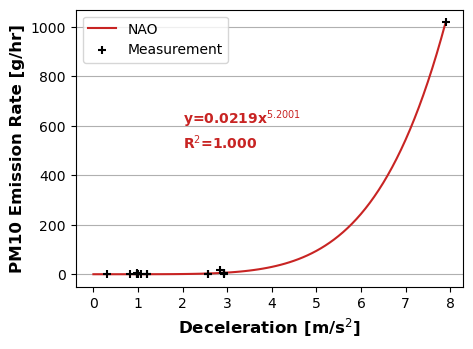

In [7]:
BWE.ER.plotERCurve("NAO")

## 1.3 Semi-metallic

In [12]:
BWE.ER.SM_PM10_ERs

,Material,Decel[m/s2],PM10ER[g/hr],"Author, Year"
26,SM,1.20,1.360000,"Sanders et al., 2003"
27,SM,2.94,4.251064,"Garg et al., 2000"
28,SM,2.94,1.884255,"Garg et al., 2000"
29,SM,7.90,944.228571,"Sanders et al., 2003"


In [11]:
BWE.ER.SM_POW_PARAM

array([0.00594554, 5.79403807])

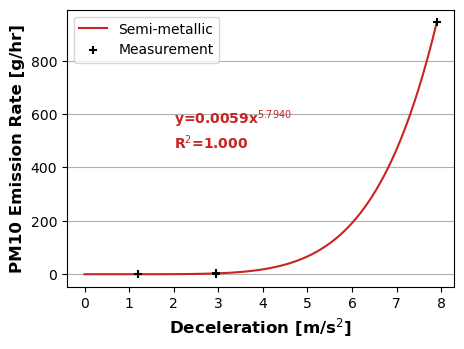

In [10]:
BWE.ER.plotERCurve("SM")

# 2 Comparison with MOVES

In [14]:
import numpy as np
import matplotlib.pyplot as plt

CHN = False  # whether use Chinese
if CHN:
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.sans-serif'] = ['SimSun']
    
# colors
BLUE = '#2878B5'
LIGHTBLUE = '#9AC9DB'
ORANGE = '#F8AC8C'
RED = '#C82423'
PINK = '#FF8884'
GREY = '#9E9E9E'

LABEL_FONT = {
    "fontsize": 12,
    "weight": "bold",
}

plt.rcParams['figure.dpi'] = 150

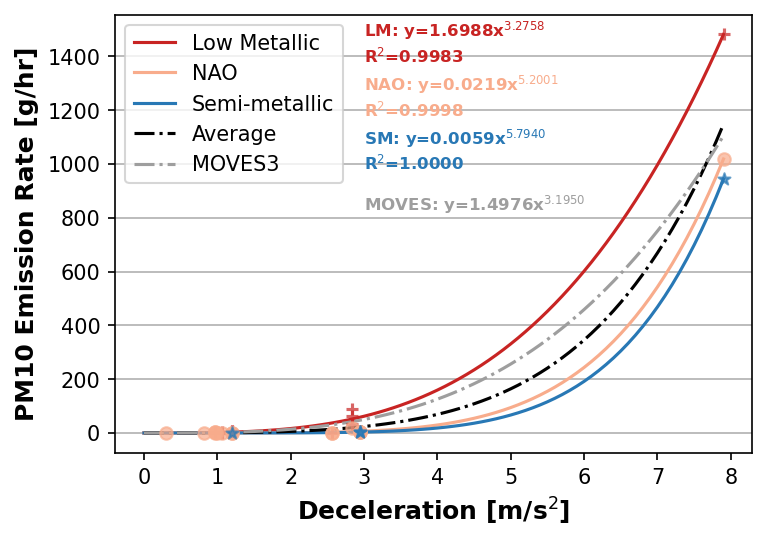

In [19]:
# comparison
fig, ax = plt.subplots(1, 1, figsize=(5,3.5), constrained_layout=True)

decel = np.arange(0, 8, 0.1)
text_x, text_y, interval = 3, 1380, 200
alpha = 0.7
LM_color, NAO_color, SM_color = RED, ORANGE, BLUE


# Low-M
pred_pow = BWE.ER.calER(decel, "LM")
ax.plot(decel, pred_pow, color=LM_color, label="Low Metallic" if CHN==False else "低金属", zorder=10)
ax.text(text_x, text_y, "LM: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.LM_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.LM_POW_SCORE, fontsize=8, color=LM_color, weight="bold")
ax.scatter(BWE.ER.LM_PM10_ERs['Decel[m/s2]'], BWE.ER.LM_PM10_ERs['PM10ER[g/hr]'], color=LM_color, marker="+", alpha=alpha, zorder=20)

# NAO
pred_pow = BWE.ER.calER(decel, "NAO")
ax.plot(decel, pred_pow, color=NAO_color, label="NAO", zorder=10)
ax.text(text_x, text_y-interval, "NAO: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.NAO_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.NAO_POW_SCORE, fontsize=8, color=NAO_color, weight="bold")
ax.scatter(BWE.ER.NAO_PM10_ERs['Decel[m/s2]'], BWE.ER.NAO_PM10_ERs['PM10ER[g/hr]'], color=NAO_color, marker="o", alpha=alpha, zorder=20)

# Semi-M
pred_pow = BWE.ER.calER(decel, "SM")
ax.plot(decel, pred_pow, color=SM_color, label="Semi-metallic" if CHN==False else "半金属", zorder=10)
ax.text(text_x, text_y-interval*2, "SM: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.SM_POW_PARAM) + "\nR$^2$=%.4f"%BWE.ER.SM_POW_SCORE, fontsize=8, color=SM_color, weight="bold")
ax.scatter(BWE.ER.SM_PM10_ERs['Decel[m/s2]'], BWE.ER.SM_PM10_ERs['PM10ER[g/hr]'], color=SM_color, marker="*", alpha=alpha, zorder=20)

# Average
pred_pow = BWE.ER.calER(decel, "avg")
ax.plot(decel, pred_pow, color='k', linestyle='dashdot', label="Average" if CHN==False else "平均排放率", zorder=10)

# MOVES
pred_pow = BWE.ER.calER(decel, "MOVES")
ax.plot(decel, pred_pow, color=GREY, linestyle='dashdot', label="MOVES3", zorder=10)
ax.text(text_x, text_y-interval*2.75, "MOVES: y=%.4fx$^{%.4f}$"%tuple(BWE.ER.MOVES_POW_PARAM), fontsize=8, color=GREY, weight="bold")

# axis label
if CHN == True:
    ax.set_xlabel("减速度 [m/s$^2$]", fontdict=LABEL_FONT)
    ax.set_ylabel("PM10 排放率 [g/hr]", fontdict=LABEL_FONT)
else:
    ax.set_xlabel("Deceleration [m/s$^2$]", fontdict=LABEL_FONT)
    ax.set_ylabel("PM10 Emission Rate [g/hr]", fontdict=LABEL_FONT)

plt.grid(axis='y', zorder=0)
plt.legend()
plt.show()